### Importing the libraries 

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore" , category=FutureWarning)

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Importing the dataset 

In [3]:
fake = pd.read_csv("Fake-210604-161841.csv")
genuine = pd.read_csv("True-210604-161650.csv")

In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
genuine.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
fake['genuineness'] = 0
genuine['genuineness'] = 1

In [7]:
data = pd.concat([fake, genuine], axis = 0)

In [8]:
display(data.head())

,title,text,subject,date,genuineness
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [9]:
data = data.reset_index(drop=True)
data=data.drop(['subject','date','title'], axis=1)
print(data.columns)

Index(['text', 'genuineness'], dtype='object')


### Data preprocessing 

#### TOKENIZATION

In [10]:
from nltk.tokenize import word_tokenize
data['text'] = data['text'].apply(word_tokenize)

In [11]:
print(data.head())

                                                text  genuineness
0  [Donald, Trump, just, couldn, t, wish, all, Am...            0
1  [House, Intelligence, Committee, Chairman, Dev...            0
2  [On, Friday, ,, it, was, revealed, that, forme...            0
3  [On, Christmas, day, ,, Donald, Trump, announc...            0
4  [Pope, Francis, used, his, annual, Christmas, ...            0


#### STEMMING 

In [12]:
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer("english",ignore_stopwords=False)

In [13]:
def stem_it(text):
    return[sb.stem(word) for word in text]
data['text'] = data['text'].apply(stem_it)

In [14]:
print(data.head())

                                                text  genuineness
0  [donald, trump, just, couldn, t, wish, all, am...            0
1  [hous, intellig, committe, chairman, devin, nu...            0
2  [on, friday, ,, it, was, reveal, that, former,...            0
3  [on, christma, day, ,, donald, trump, announc,...            0
4  [pope, franci, use, his, annual, christma, day...            0


In [15]:
def stopword_remover(text):
    return [word for word in text if len(word)>>2]
data['text'] = data['text'].apply(' '.join)

In [16]:
print(data.head())

                                                text  genuineness
0  donald trump just couldn t wish all american a...            0
1  hous intellig committe chairman devin nune is ...            0
2  on friday , it was reveal that former milwauke...            0
3  on christma day , donald trump announc that he...            0
4  pope franci use his annual christma day messag...            0


#### Splitting the dataset 

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['genuineness'], test_size=0.25)

In [19]:
print(X_train.head())

34059    chicago ( reuter ) - an illinoi voter ’ s laws...
6815     the co-found of ben & jerri s ice cream , ben ...
9512     donna brazil let it rip on the hillari clinton...
4569     a dalla polic offic , see red after sever shoo...
9751     nevada governor brian sandov introduc presid t...
Name: text, dtype: object


#### Vectorization 

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_df=0.7)
tfidf_train = tfidf.fit_transform(X_train)
tfidf_test = tfidf.transform(X_test)

In [23]:
print(tfidf_train)

  (0, 66106)	0.028686675799103983
  (0, 61160)	0.01282843706938515
  (0, 22815)	0.036312933404630626
  (0, 42483)	0.022895780292155006
  (0, 77817)	0.0258005977804087
  (0, 28319)	0.07393288092102565
  (0, 22807)	0.02344980536173196
  (0, 41537)	0.024747014546057808
  (0, 72551)	0.08160104254746878
  (0, 33612)	0.022758473935150642
  (0, 11013)	0.029562954962846045
  (0, 81846)	0.010205725662281912
  (0, 89795)	0.06792455418377097
  (0, 52302)	0.04118735167818233
  (0, 60147)	0.057062199344456166
  (0, 44472)	0.04265558758761025
  (0, 28312)	0.03535807782465558
  (0, 61366)	0.0619498846762765
  (0, 31994)	0.06303686885195066
  (0, 65774)	0.01850769321276807
  (0, 42422)	0.047608868177467525
  (0, 9925)	0.01566383460987147
  (0, 26616)	0.014430841873026469
  (0, 30460)	0.028271379632824542
  (0, 76873)	0.01482320045705668
  :	:
  (33672, 9185)	0.02310418869964885
  (33672, 37869)	0.030908412406635742
  (33672, 62652)	0.019107108045957288
  (33672, 80244)	0.016477656780743456
  (33672, 8

### Creating the model 

#### Logistic regression 

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [25]:
model1 = LogisticRegression(max_iter=900)
model1.fit(tfidf_train, y_train)

LogisticRegression(max_iter=900)

In [26]:
pred1 = model1.predict(tfidf_test)
cr1 = accuracy_score(y_test,pred1)
print(cr1*100)

98.77951002227171


#### PassiveAggressiveClassifier 

In [27]:
from sklearn.linear_model import PassiveAggressiveClassifier
model2 = PassiveAggressiveClassifier(max_iter=100)
model2.fit(tfidf_train, y_train)

PassiveAggressiveClassifier(max_iter=100)

In [28]:
ypred = model2.predict(tfidf_test)
accscore = accuracy_score(y_test, ypred)
print('The accuracy of prediction is ',accscore*100)

The accuracy of prediction is  99.52783964365256


Text(69.0, 0.5, 'Truth')

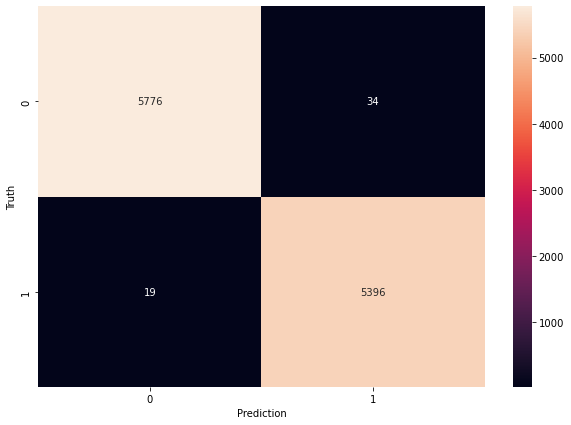

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,ypred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')